In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

# EDA

In [2]:
## https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

df = pd.read_csv('Aemf1.csv')

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.rename(columns = {'restraunt_index':'restaurant_index', 'normalised_restraunt_index':'normalized_restaurant_index', 'normalised_attraction_index': "normalized_attraction_index"}, inplace = True)

df

<ipython-input-2-70e071e83261>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
<ipython-input-2-70e071e83261>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalized_attraction_index,restaurant_index,normalized_restaurant_index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         41714 non-null  object 
 1   price                        41714 non-null  float64
 2   day                          41714 non-null  object 
 3   room_type                    41714 non-null  object 
 4   shared_room                  41714 non-null  bool   
 5   private_room                 41714 non-null  bool   
 6   person_capacity              41714 non-null  float64
 7   superhost                    41714 non-null  bool   
 8   multiple_rooms               41714 non-null  int64  
 9   business                     41714 non-null  int64  
 10  cleanliness_rating           41714 non-null  float64
 11  guest_satisfaction           41714 non-null  float64
 12  bedrooms                     41714 non-null  int64  
 13  city_center_km  

In [5]:
df.dtypes

city                            object
price                          float64
day                             object
room_type                       object
shared_room                       bool
private_room                      bool
person_capacity                float64
superhost                         bool
multiple_rooms                   int64
business                         int64
cleanliness_rating             float64
guest_satisfaction             float64
bedrooms                         int64
city_center_km                 float64
metro_distance_km              float64
attraction_index               float64
normalized_attraction_index    float64
restaurant_index               float64
normalized_restaurant_index    float64
dtype: object

In [6]:
count_city = df['city'].value_counts()
count_city

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: city, dtype: int64

In [7]:
grouped = df.groupby('city')
count_weekend_vs_weekday = grouped['day'].value_counts()
count_weekend_vs_weekday

city       day    
Amsterdam  Weekday    1103
           Weekend     977
Athens     Weekday    2653
           Weekend    2627
Barcelona  Weekday    1555
           Weekend    1278
Berlin     Weekday    1284
           Weekend    1200
Budapest   Weekday    2074
           Weekend    1948
Lisbon     Weekend    2906
           Weekday    2857
Paris      Weekend    3558
           Weekday    3130
Rome       Weekend    4535
           Weekday    4492
Vienna     Weekend    1799
           Weekday    1738
Name: day, dtype: int64

In [8]:
grouped = df.groupby('city')
count_price = grouped['price'].mean()
count_price

city
Amsterdam    573.112795
Athens       151.744121
Barcelona    293.753706
Berlin       244.583752
Budapest     176.513548
Lisbon       238.210479
Paris        392.531403
Rome         205.391950
Vienna       241.582484
Name: price, dtype: float64

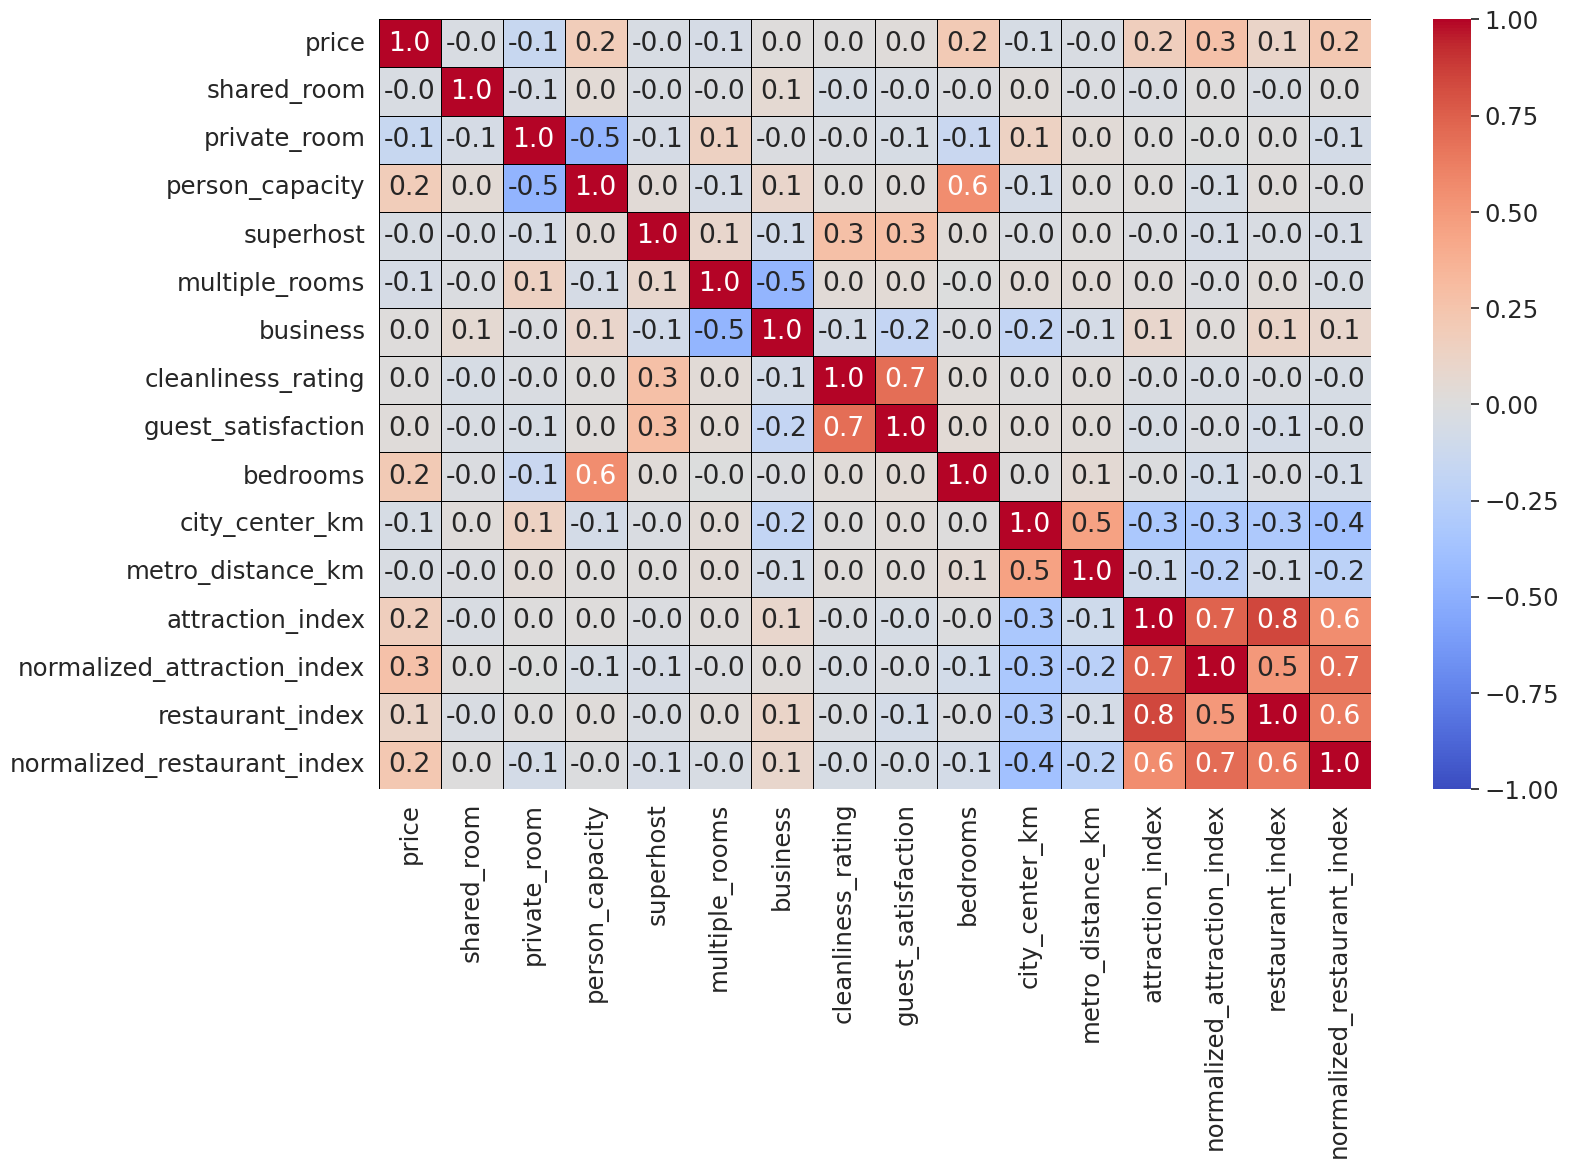

In [9]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

sns.set(font_scale=1.6)
plt.figure(figsize=(16,10))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    vmin=-1, vmax=1,
    fmt = ".1f",
    linewidths=0.5,
    linecolor='black',
    square=False,
);

Dependencies -- price and bedrooms, cleanliness and guest satisfaction, person capacity and bedrooms

Possible Project Outline of Goals:

- Which predictors have the greatest impact on price and which have the greatest impact on guest satisfaction

- regression classification algorithm tree (maybe random forest) to predict price and guest satisfaction
Predict two different variables:

guest satisfaction
price you should charge

- list of strategies for as AirBnB owners which can make you the most profits in terms of having high guest satisfaction and also pricing

As a consumer you're looking for high guest satisfaction rates and low prices

As an AirBnB owner you're wondering how to get those high satisfaction rates to have happy renters and what price point you should even offer

# Using Price as Predictor Output - No Segmentation into Cities



In [10]:
df['city'] = df['city'].astype('category')

df = pd.get_dummies(df, prefix_sep = "_", drop_first = True)
df

# Re-define X (inputs/predictors) and y (output/outcome)
price_df = df.drop(columns = ['guest_satisfaction'])

y_reg = price_df['price']
X_reg = price_df.drop(columns=['price'])

# Split data into training and testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=0)

In [11]:
# Call the Decision Tree Object with parameters
# We're going to set max depth to 5 to keep things manageable
clf_reg = DecisionTreeRegressor(
      max_depth=5,
      min_samples_split = 40,
      min_samples_leaf = 100,
      min_impurity_decrease = 0.01,
      criterion = 'squared_error')

# Fit the model to the training data
clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=100, min_samples_split=40)

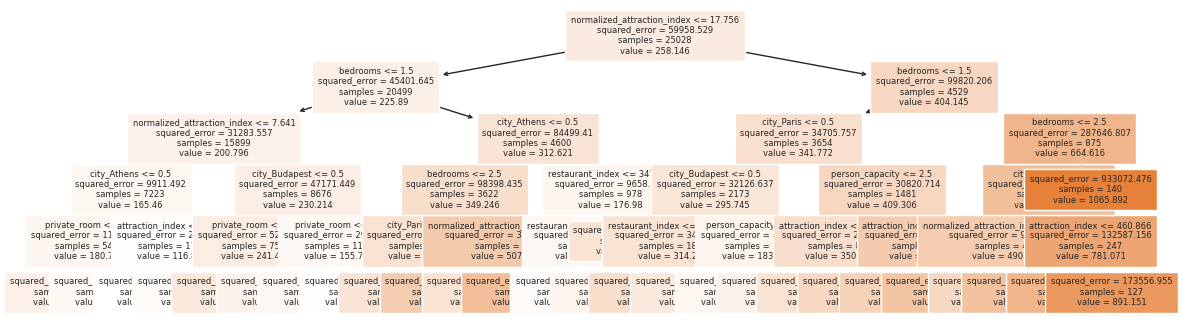

In [18]:
# Plot the regression tree
fig = plt.figure(figsize=(14, 4))
tree.plot_tree(clf_reg, fontsize=6, feature_names=X_reg.columns, filled=True);

In [19]:
# Evaluate the accuracy of the tree
y_pred_reg = clf_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg,y_pred_reg))
r2 = r2_score(y_test_reg,y_pred_reg)
print("RMSE=", round(rmse,3), "R2=", round(r2,3))

RMSE= 300.199 R2= 0.143


High RMSE means difficult to predict price - off by about 300. R2 being low - features in the decision tree model can explain 14.3% of the variance in the target variable
  - higher R2 is desriable because it means a larger proportion of the variance is explained by the model

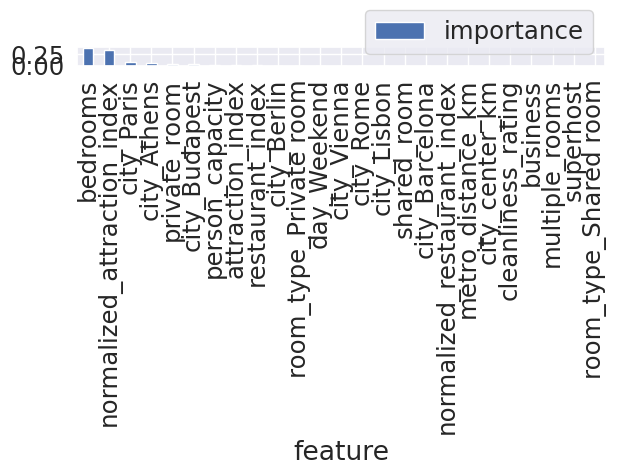

In [20]:
# Extract importance values for each feature (column of X)
importances = clf_reg.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train_reg.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

Some of the biggest predictors for price are the city itself
- for instance Paris (most expensive) and Athens (least expensive) overall prices have a large impact in the price total when using a decision tree for regression


Next Step: try to segment based off of city since there is such a wide range of prices dependent on the city itself

# Regression Decision Tree, Random Forest for Price by City, Case Study

Determine Price Range for all Cities

In [21]:
df = pd.read_csv('Aemf1.csv')

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.rename(columns = {'restraunt_index':'restaurant_index', 'normalised_restraunt_index':'normalized_restaurant_index', 'normalised_attraction_index': "normalized_attraction_index"}, inplace = True)

df

,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalized_attraction_index,restaurant_index,normalized_restaurant_index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [24]:
### overall prices

# group mean, price, range

city_stat = df.groupby('city').agg({'price': ['mean', lambda x: x.max() - x.min(), 'max', 'min']})

# rename columns
city_stat.columns = ['Mean Price', 'Price Range', 'High Price', 'Low Price']

# reset index to have 'City' as a regular column
city_stat.reset_index(inplace=True)
city_stat

,city,Mean Price,Price Range,High Price,Low Price
0,Amsterdam,573.112795,8001.780986,8130.668104,128.887118
1,Athens,151.744121,18502.566025,18545.450285,42.884259
2,Barcelona,293.753706,6874.112691,6943.700980,69.588289
3,Berlin,244.583752,5792.511919,5857.483407,64.971487
4,Budapest,176.513548,3716.454387,3751.233727,34.779339
5,Lisbon,238.210479,1610.459662,1681.050657,70.590994
6,Paris,392.531403,16352.875384,16445.614689,92.739305
7,Rome,205.391950,2372.290931,2418.348023,46.057092
8,Vienna,241.582484,13600.729262,13664.305916,63.576654


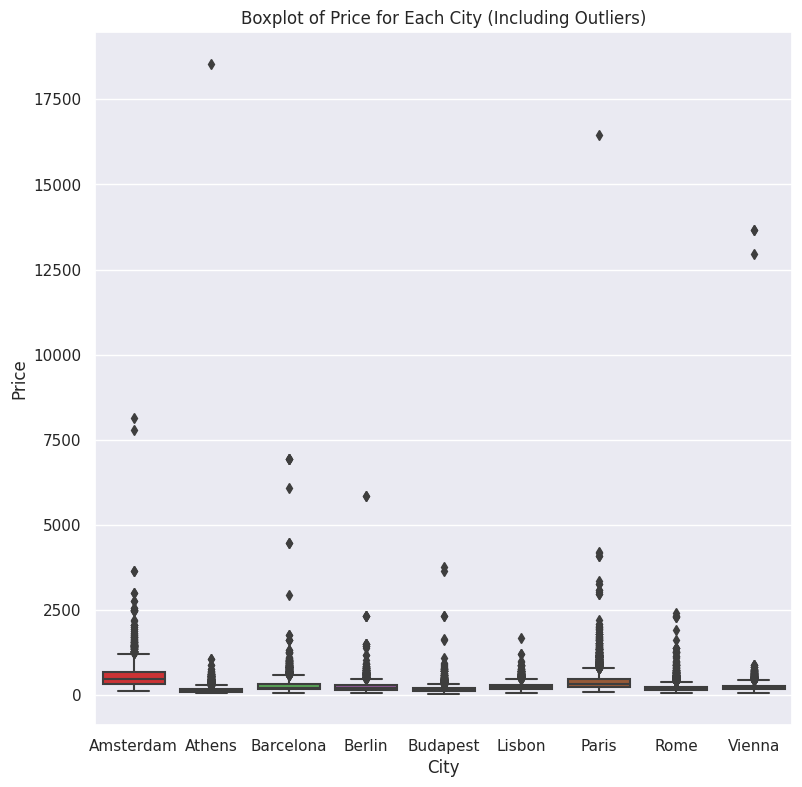

In [25]:
sns.set(style="darkgrid")

# Create a boxplot for price for each city
plt.figure(figsize=(9, 9))
sns.boxplot(x='city', y='price', data=df, palette = "Set1")
plt.title('Boxplot of Price for Each City (Including Outliers)')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

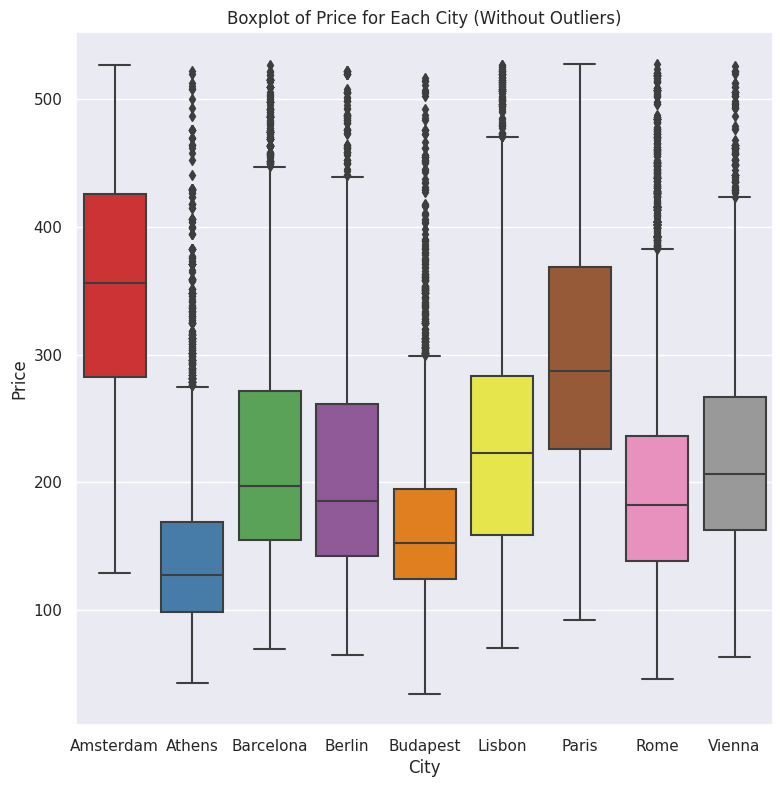

In [26]:
# IQR for price to determine where outliers fall
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds get rid of outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# get rid of outliers
df_no_outliers = df[(df['price'] >= lower) & (df['price'] <= upper)]
df = df_no_outliers

df.head()


# No outlier box plot
sns.set(style="darkgrid")
plt.figure(figsize=(9, 9))
sns.boxplot(x='city', y='price', data=df, palette = "Set1")
plt.title('Boxplot of Price for Each City (Without Outliers)')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

In [27]:
### Without Outliers Stats


city_stat = df.groupby('city').agg({'price': ['mean', lambda x: x.max() - x.min(), 'max', 'min']})
city_stat.columns = ['Mean Price', 'Price Range', 'High Price', 'Low Price']
city_stat.reset_index(inplace=True)
city_stat

,city,Mean Price,Price Range,High Price,Low Price
0,Amsterdam,354.109178,397.206665,526.093783,128.887118
1,Athens,144.354423,478.757059,521.641319,42.884259
2,Barcelona,227.110980,456.862243,526.450532,69.588289
3,Berlin,211.988194,456.903805,521.875292,64.971487
4,Budapest,167.491323,481.035860,515.815200,34.779339
5,Lisbon,230.253192,455.675422,526.266417,70.590994
6,Paris,299.216175,434.569857,527.309162,92.739305
7,Rome,197.229417,480.910855,526.967947,46.057092
8,Vienna,221.750960,461.631957,525.208611,63.576654


In [28]:
full_cities = df['city'].unique()

for city in full_cities:
    city_data = df[df['city'] == city]

    # data preprocessing - get column names normalized
    city_data.columns = city_data.columns.str.lower()
    city_data.columns = city_data.columns.str.replace(' ', '_')
    city_data.columns = city_data.columns.str.replace('(', '')
    city_data.columns = city_data.columns.str.replace(')', '')
    city_data.rename(columns={'restraunt_index': 'restaurant_index',
                              'normalised_restraunt_index': 'normalized_restaurant_index',
                              'normalised_attraction_index': 'normalized_attraction_index'}, inplace=True)

    # keep the ones that are normalized
    city_data = city_data.drop(columns=['attraction_index', 'restaurant_index'])

    # naive rule
    avg_price = city_data['price'].mean()
    naive = np.full(len(city_data['price']), avg_price)
    rmse_naive = np.sqrt(mean_squared_error(city_data['price'], naive))
    print(f"{city} Naive Rule RMSE:", rmse_naive)


    # regression decision tree
    drop_city = city_data.drop(columns=['city'])
    drop_city = pd.get_dummies(drop_city, prefix_sep="_", drop_first=True)

    price_df = drop_city.drop(columns=['guest_satisfaction'])

    y_reg = price_df['price']
    X_reg = price_df.drop(columns=['price'])

    # Split data into training and testing
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=0)

    # decision tree regressor object
    clf_reg = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=40,
        min_samples_leaf=100,
        min_impurity_decrease=0.01,
        criterion='squared_error',
        random_state=0
    )
    clf_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = clf_reg.predict(X_test_reg)

    # show the tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf_reg, filled=True, feature_names=X_train_reg.columns, rounded=True, fontsize=10)
    plt.title(f'Decision Tree for {city}')
    plt.show()

    # RMSE for regression tree
    rmse_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
    r2_reg = r2_score(y_test_reg, y_pred_reg)
    print(f"{city} Decision tree regressor RMSE:", rmse_reg, "R2:", r2_reg)

    # Importance plot for regression tress
    importances = clf_reg.feature_importances_
    df_importance = pd.DataFrame({'feature': X_train_reg.columns, 'importance': importances})
    df_importance = df_importance.sort_values('importance', ascending=False)

    ax = df_importance.plot(kind='bar', x='feature', title=f'Regression Feature Importance: {city}')
    plt.tight_layout()
    plt.show()

    # random forest regressor
    clf_rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=40,
        min_samples_leaf=100,
        min_impurity_decrease=0.01,
        criterion='squared_error',
        random_state=0
    )
    clf_rf.fit(X_train_reg, y_train_reg)
    y_pred_rf = clf_rf.predict(X_test_reg)


    # RMSE random forest
    rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
    r2_rf = r2_score(y_test_reg, y_pred_rf)
    print(f"{city} Random Forest Regressor RMSE: ", rmse_rf, "R2:", r2_rf)

    # important features for random forest
    importances_rf = clf_rf.feature_importances_
    df_importance_rf = pd.DataFrame({'feature': X_train_reg.columns, 'importance': importances_rf})
    df_importance_rf = df_importance_rf.sort_values('importance', ascending=False)

    ax_rf = df_importance_rf.plot(kind='bar', x='feature', title=f'RF Feature Importance: {city}')
    plt.tight_layout()
    plt.show()

    print("--------------------------------------------------------------------------------------------")

Output hidden; open in https://colab.research.google.com to view.

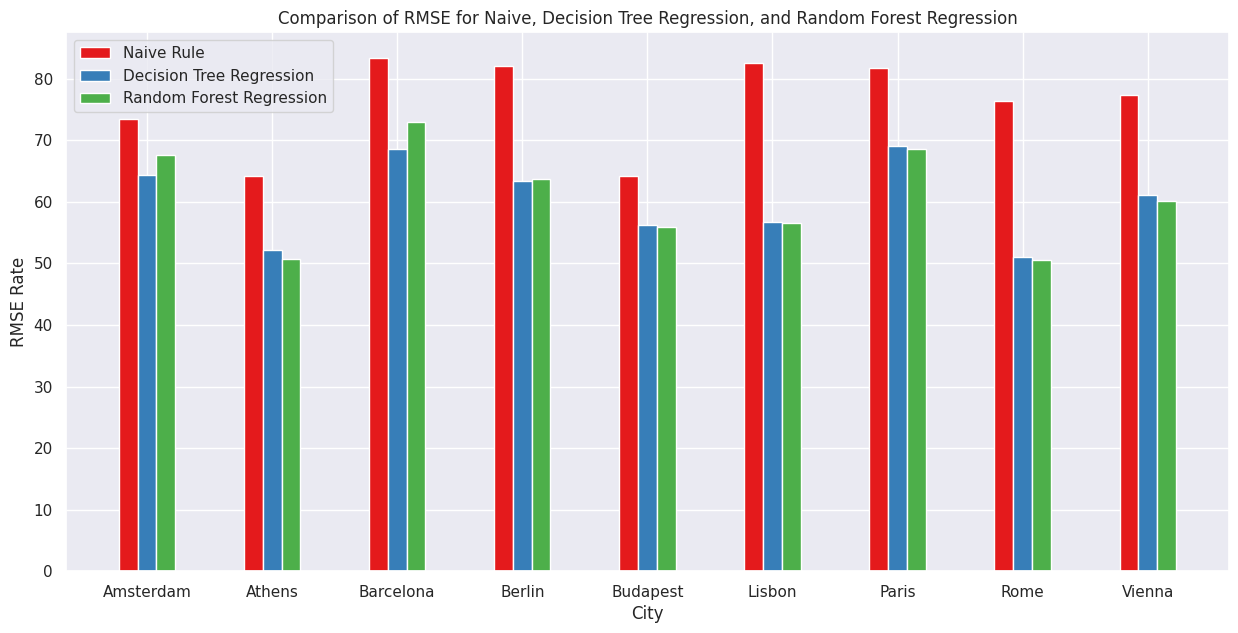

In [29]:
# https://www.educative.io/answers/how-to-adjust-the-bar-width-of-bar-plots-in-matplotlib#:~:text=The%20default%20value%20for%20the,suitable%20size%20of%20our%20choice.
# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

cities = ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'Paris', 'Rome', 'Vienna']
naive_RMSE = [73.497, 64.155, 83.375, 81.993, 64.275, 82.612, 81.727, 76.382, 77.407]
dt_RMSE = [64.338, 52.161, 68.536, 63.389, 56.252, 56.766, 69.124, 51.012, 61.171]
rf_RMSE = [67.604, 50.717,73.027, 63.638, 55.910, 56.509, 68.601, 50.605, 60.064]

sns.set_palette("Set1")
bar_width = 0.15

#position of bar on bargraph
position = np.arange(len(cities))

plt.figure(figsize=(15, 7))

# x positions of bar y based off rmse
plt.bar(position, naive_RMSE, width=bar_width, label='Naive Rule')

# x positions of bar shifts bars to the right based off of naive bars
plt.bar(position + 0.15, dt_RMSE, width=bar_width, label='Decision Tree Regression')

#x positions of bar shifts to the right of the dt RMSE bars
plt.bar(position + 0.3, rf_RMSE, width=bar_width, label='Random Forest Regression')

plt.xlabel('City')
plt.ylabel('RMSE Rate')
plt.title('Comparison of RMSE for Naive, Decision Tree Regression, and Random Forest Regression')
plt.xticks(position + bar_width, cities)
plt.legend()
plt.show()

## CASE STUDY (TRIAL OF PRICE PREDICTOR)

In [30]:
df.head()

,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalized_attraction_index,restaurant_index,normalized_restaurant_index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [31]:
rome_data = df[df['city'] == 'Rome']

mean_restaurant_index = rome_data['normalized_restaurant_index'].mean()
mean_restaurant_index

24.884470094368584

In [32]:
features = ['city', 'day', 'room_type', 'shared_room', 'private_room',
            'person_capacity', 'superhost', 'multiple_rooms', 'business',
            'cleanliness_rating', 'guest_satisfaction', 'bedrooms',
            'city_center_km', 'metro_distance_km', 'attraction_index',
            'normalized_attraction_index', 'restaurant_index', 'normalized_restaurant_index']

X = df[features]
y = df['price']

# dummy code
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Random forest
rf_trial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_trial.fit(X_train, y_train)

# create new investor with specific features
new_investor = pd.DataFrame({
    'city_Amsterdam': 0,
    'city_Athens': 0,
    'city_Barcelona': 0,
    'city_Berlin': 0,
    'city_Budapest': 0,
    'city_Lisbon': 0,
    'city_Rome': 1,  # Our investor has a apartment in Rome
    'city_Paris': 0,
    'city_Vienna': 0,
    'day_Weekend': 1,
    'day_Weekday': 0,
    'room_type_Private room': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Shared room': 0,
    'shared_room': False,
    'private_room': True,
    'person_capacity': 4.0,
    'superhost': False,
    'multiple_rooms': 1,
    'business': 0,
    'cleanliness_rating': 10.0,
    'guest_satisfaction': 92.0,
    'bedrooms': 2,
    'city_center_km': 1.2,
    'metro_distance_km': 0.9,
    'attraction_index': 500,
    'normalized_attraction_index': 6.2,
    'restaurant_index': 500,
    'normalized_restaurant_index': 6.2
}, index = [0]) # label each row so it matches with the training data

new_investor = new_investor[X.columns] #keeps columns consistent

# what should our new host charge?
predicted_price = rf_trial.predict(new_investor)
print("Predicted Price", predicted_price)

Predicted Price [210.13957403]


In [33]:
features = ['city', 'day', 'room_type', 'shared_room', 'private_room',
            'person_capacity', 'superhost', 'multiple_rooms', 'business',
            'cleanliness_rating', 'guest_satisfaction', 'bedrooms',
            'city_center_km', 'metro_distance_km', 'attraction_index',
            'normalized_attraction_index', 'restaurant_index', 'normalized_restaurant_index']

X = df[features]
y = df['price']

# dummy code
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Random forest
rf_trial = RandomForestRegressor(n_estimators=100, random_state=42)
rf_trial.fit(X_train, y_train)

# create new investor (2) with specific features that according to our model would change the price the MOST for an apartment in Rome
new_investor2 = pd.DataFrame({
    'city_Amsterdam': 0,
    'city_Athens': 0,
    'city_Barcelona': 0,
    'city_Berlin': 0,
    'city_Budapest': 0,
    'city_Lisbon': 0,
    'city_Rome': 1,  # Our investor has a apartment in Rome
    'city_Paris': 0,
    'city_Vienna': 0,
    'day_Weekend': 1,
    'day_Weekday': 0,
    'room_type_Private room': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Shared room': 0,
    'shared_room': False,
    'private_room': True,
    'person_capacity': 4.0,
    'superhost': False,
    'multiple_rooms': 1,
    'business': 0,
    'cleanliness_rating': 10.0,
    'guest_satisfaction': 92.0,
    'bedrooms': 2,
    'city_center_km': 1.2,
    'metro_distance_km': 0.9,
    'attraction_index': 500,
    'normalized_attraction_index': 6.2,
    'restaurant_index': 500,
    'normalized_restaurant_index': 50
}, index = [0]) # label each row so it matches with the training data

new_investor2 = new_investor2[X.columns] #keeps columns consistent

# what should our new host charge?
predicted_price = rf_trial.predict(new_investor2)
print("Predicted Price", predicted_price)

Predicted Price [233.61830538]
